In [1]:
import os
import sys
import waveformDumper
import numpy as np
import matplotlib.pyplot as plt
import struct
import pandas as pd

from matplotlib import colors
from matplotlib import ticker

In [2]:
import matplotlib

nice_fonts = {
    "text.usetex": True,
    "font.size": 18,
    "axes.formatter.limits": (-2, 5),
    'xtick.direction': 'in',
    'ytick.direction': 'in',
}

matplotlib.rcParams.update(nice_fonts)

c1 = '#dc2f18'
c2 = '#2d82b7'
#c3 = '#aaae8e'
c3 = '#885a89'
c4 = '#07004d'

mcols = [c2, c3, c4, 'maroon']

In [30]:
filename = "/Users/vitaliy/Desktop/daq/mdoc/runApril/adc_data_run_25036_ch_40_all.npy"
datn = np.load(filename, allow_pickle=True)

In [31]:
filename = "/Users/vitaliy/Desktop/daq/mdoc/runApril/adc_data_run_25066_ch_40_all.npy"
datc = np.load(filename, allow_pickle=True)

In [32]:
datn = datn.astype(np.int16)
datc = datc.astype(np.int16)

In [33]:
#datn = datn[:int(len(datn)/2)]

In [34]:
def substract_peds(data):
    peds = np.array([np.argmax(np.bincount(data[i])) for i in range(len(data))])
    peds = peds[:, np.newaxis]
    return data - peds

In [35]:
datn = substract_peds(datn)
datc = substract_peds(datc)

In [36]:
datn.shape, datc.shape

((16600, 65536), (4200, 262144))

In [37]:
import scipy
from scipy.signal import find_peaks


In [38]:
def get_peaks(data):
    all_peaks, all_heights = [], []
    for i in range(len(data)):
        peaks, heights = find_peaks(data[i], height=100, distance=150)
        #print(peaks, heights['peak_heights'])
        all_peaks +=list(peaks)
        all_heights += list(heights['peak_heights'])

    return np.array(all_peaks).flatten(), np.array(all_heights).flatten()

In [39]:
pn, hn = get_peaks(datn)
pc, hc = get_peaks(datc)

In [40]:
pc = pc % 65536

(array([139., 127., 117., 138., 126., 136., 124., 104., 115., 111., 128.,
        108., 121., 119., 119., 121.,  95., 117., 121., 110., 129., 129.,
        111., 121., 118., 115., 112., 120., 122., 123.,  91., 110., 126.,
        118., 114., 121.,  86., 119., 131., 108., 114., 126., 116., 126.,
        128., 111., 124., 122., 113., 138., 106., 114., 132., 117., 105.,
        116., 101., 112., 120., 109., 123., 128., 101., 134., 121., 117.,
        100., 117., 108., 120., 139., 117., 119., 130., 122., 132., 123.,
        131., 119., 121., 123., 128., 116., 111., 132., 110., 128., 115.,
        112., 122., 131., 125., 114., 126., 112., 117., 135., 120., 107.,
        114., 115., 126., 101., 110., 116., 128., 119., 114.,  99., 107.,
        132., 123., 117., 119., 112., 124., 115., 121., 111., 113., 125.,
         99., 133., 123., 132., 125., 113., 109., 130., 118., 110., 118.,
        112., 131., 125., 130., 131., 118., 122., 110., 134., 123., 122.,
        115., 111., 124., 112., 118., 

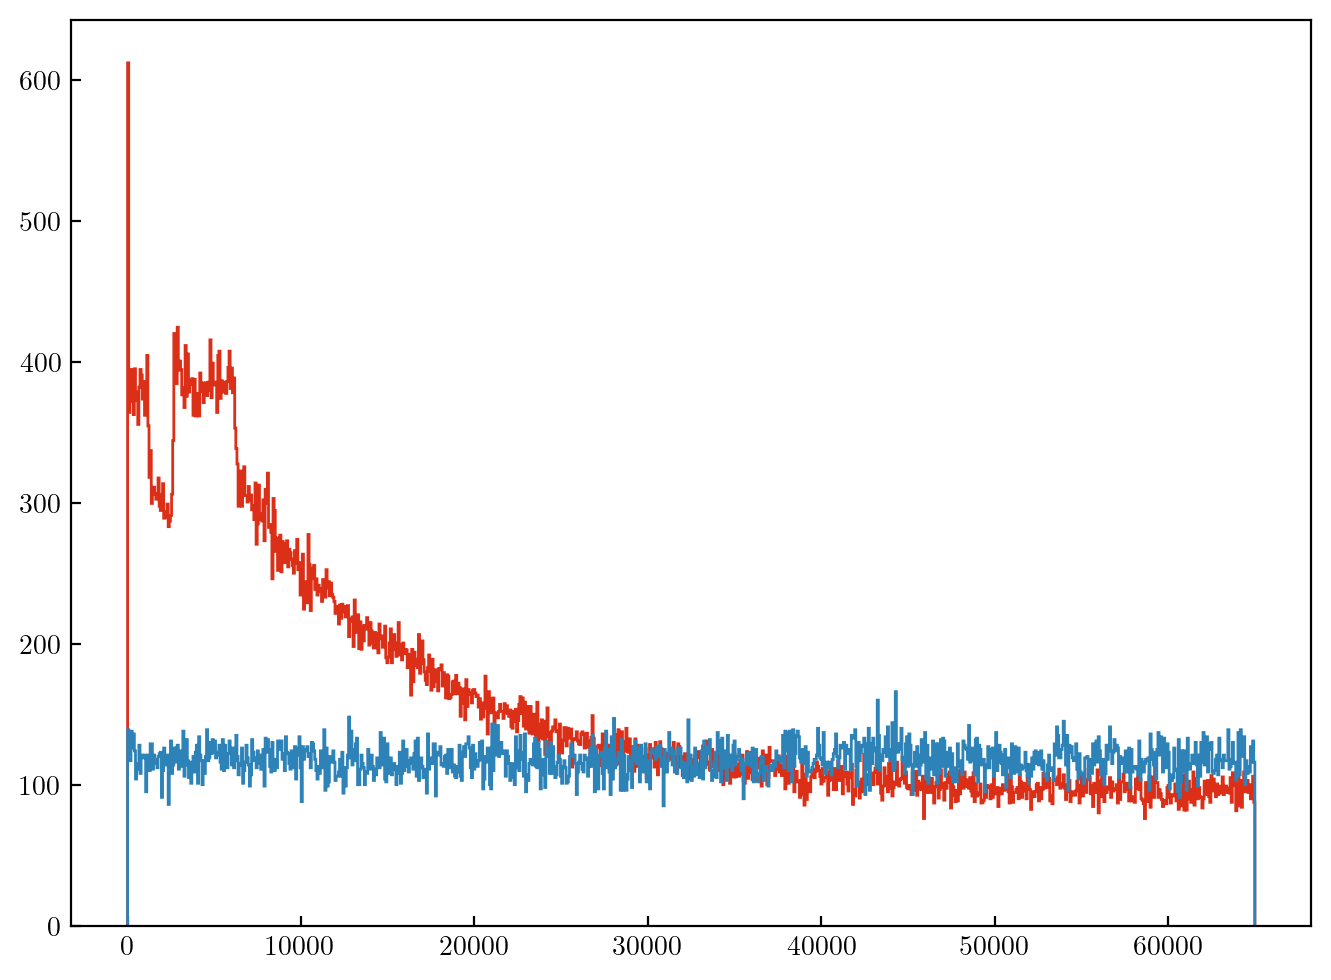

In [45]:
fig, ax = plt.subplots(figsize = [8, 6], dpi=200)

bins, lims = 1000, [0, 65000]
ax.hist(pn, bins, lims, histtype='step', color=c1, weights=np.ones(len(pn))/2)
ax.hist(pc, bins, lims, histtype='step', color=c2)

(array([211., 184., 208., 197., 183., 168., 182., 176., 190., 189., 152.,
        194., 162., 206., 180., 173., 178., 188., 177., 171., 162., 190.,
        181., 153., 182., 183., 194., 168., 194., 184., 191., 193., 175.,
        186., 188., 172., 157., 177., 171., 197., 162., 209., 167., 172.,
        172., 195., 189., 190., 195., 194., 200., 180., 201., 172., 190.,
        172., 187., 181., 191., 194., 189., 171., 201., 180., 169., 189.,
        165., 170., 184., 184., 157., 185., 190., 180., 175., 188., 187.,
        168., 168., 199., 200., 188., 166., 198., 178., 170., 194., 204.,
        184., 186., 179., 201., 186., 169., 189., 181., 185., 180., 179.,
        201.]),
 array([    0.,   100.,   200.,   300.,   400.,   500.,   600.,   700.,
          800.,   900.,  1000.,  1100.,  1200.,  1300.,  1400.,  1500.,
         1600.,  1700.,  1800.,  1900.,  2000.,  2100.,  2200.,  2300.,
         2400.,  2500.,  2600.,  2700.,  2800.,  2900.,  3000.,  3100.,
         3200.,  3300.,  3400.

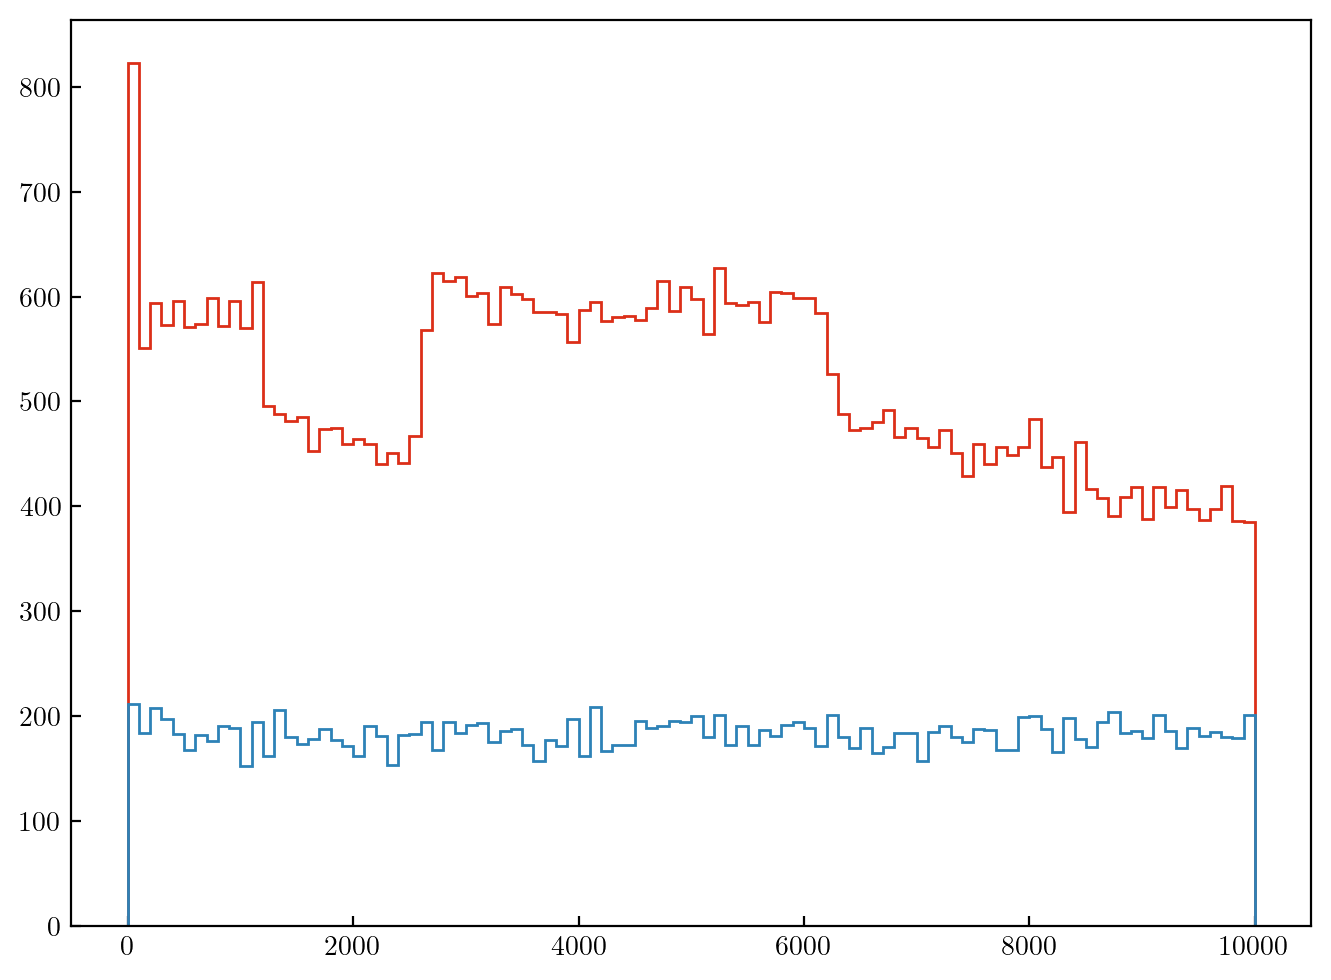

In [42]:
fig, ax = plt.subplots(figsize = [8, 6], dpi=200)

bins, lims = 100, [0, 10000]
ax.hist(pn, bins, lims, histtype='step', color=c1, weights=np.ones(len(pn))/2)
ax.hist(pc, bins, lims, histtype='step', color=c2)

In [50]:
waves_pulse = datn[:, :20000]

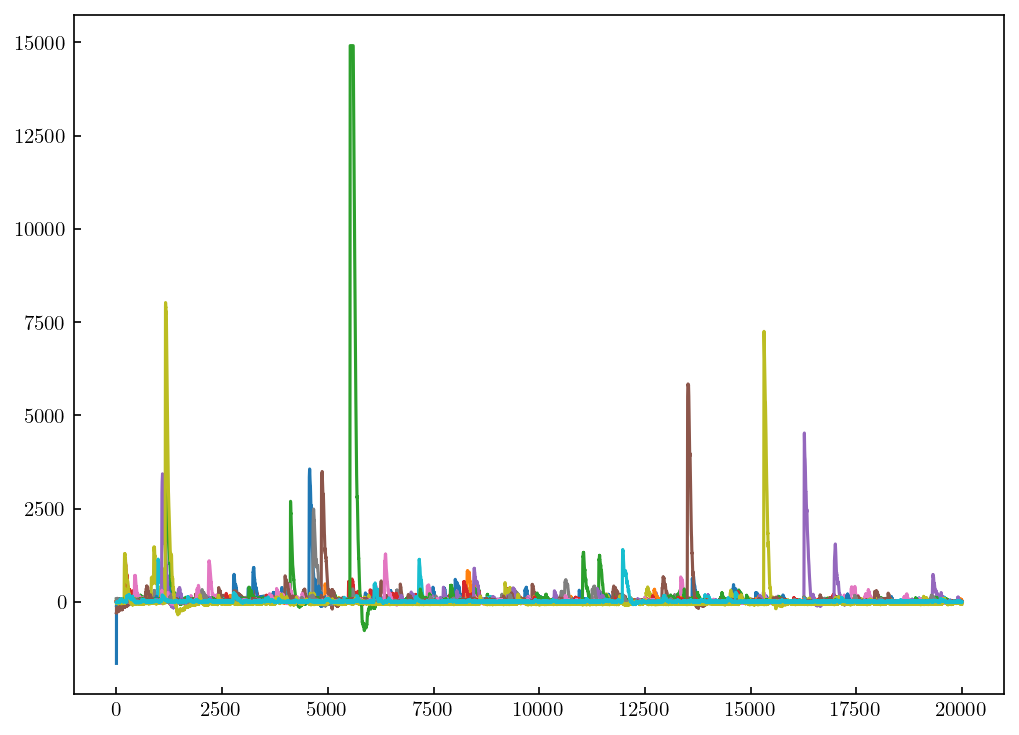

In [51]:
fig, ax = plt.subplots(figsize=[8, 6], dpi=150)

for i in range(20):
    ax.plot(waves_pulse[i])

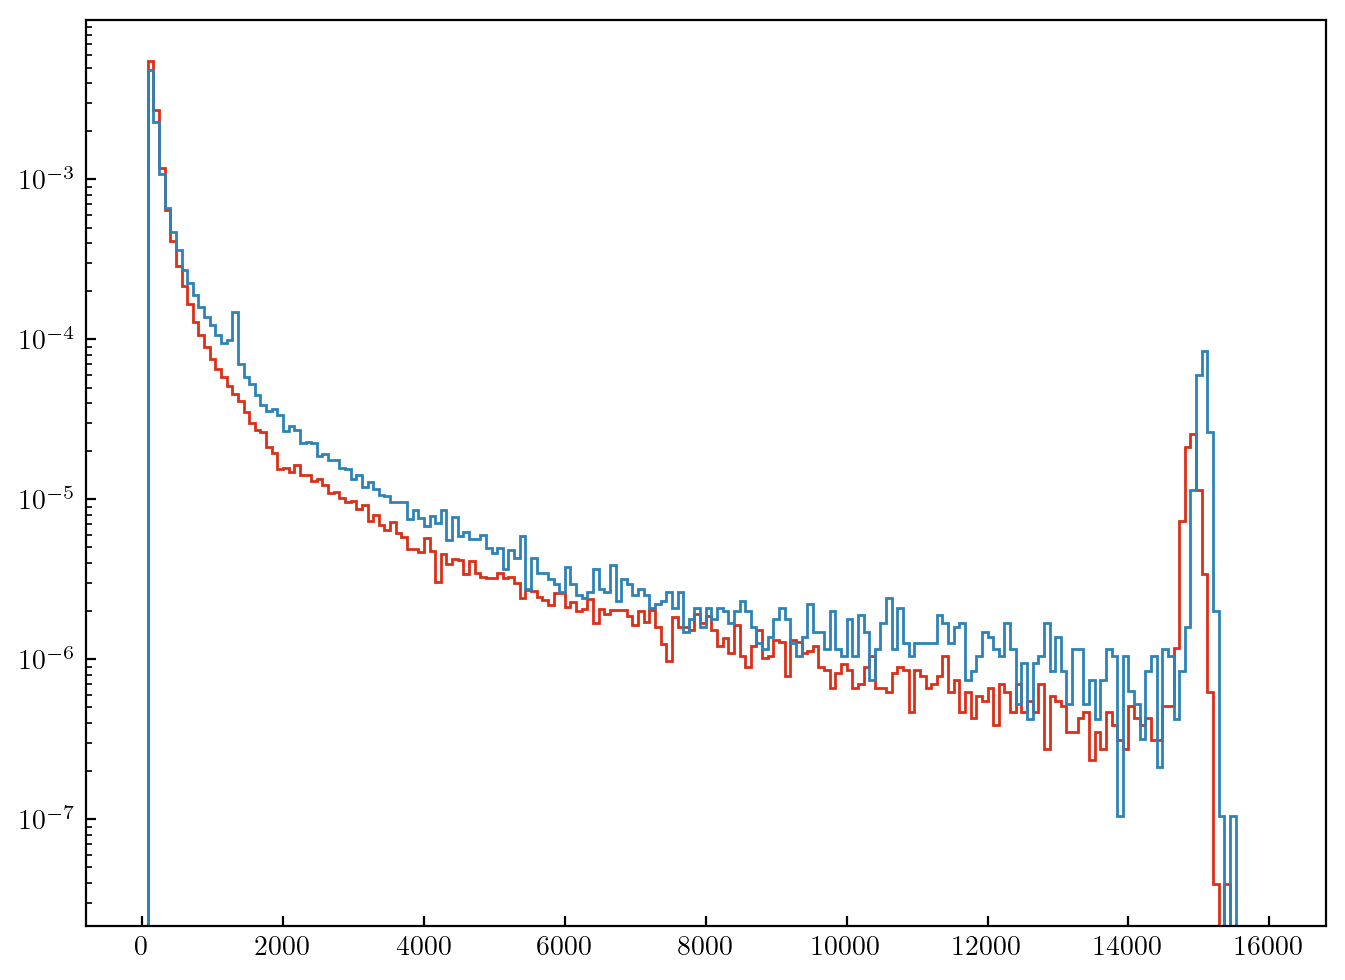

In [44]:
fig, ax = plt.subplots(figsize = [8, 6], dpi=200)

bins, lims = 200, [0, 16000]
ax.hist(hn, bins, lims, histtype='step', color=c1, density=True)
ax.hist(hc, bins, lims, histtype='step', color=c2, density=True)

ax.set_yscale('log')

In [18]:
s1, s2 = datn.shape
mult = int(s2/2048)
datn = datn.reshape(s1 * mult, int(s2/mult))

s1, s2 = datc.shape
mult = int(s2/2048)
datc = datc.reshape(s1 * mult, int(s2/mult))

In [19]:
print(datn.shape)
print(datc.shape)

(265600, 2048)
(537600, 2048)


In [20]:
datn = datn[ (np.max(datn, axis=1)>400) & (np.max(datn, axis=1)<12.5e3)]
datc = datc[ (np.max(datc, axis=1)>400) & (np.max(datc, axis=1)<12.5e3)]

In [21]:
print(datn.shape)
print(datc.shape)

(28620, 2048)
(28250, 2048)


In [22]:
def get_fps(data, l1, r1, r2):
    fps, pes = [], []
    rising_edge         = np.argmax(np.gradient(data, axis=1), axis=1)
    bprompt, endprompt  = rising_edge+l1, rising_edge+r1
    eall                = rising_edge+r2
    locmaxs = np.argmax(data, axis=1)

    for i in range(len(data)):
        if locmaxs[i] < 100 or locmaxs[i] > 1900: continue
        pr = data[i][bprompt[i]:endprompt[i]]
        pr = pr[pr>0]
        ali = data[i][bprompt[i]:eall[i]]
        ali = ali[ali>0]
        fps.append( np.sum(pr)/ np.sum(ali))
        pes.append( np.sum(ali)) 

    return np.array(fps), np.array(pes)


In [23]:
fpsn, intsn = get_fps(datn, 10, 50, 120)
fpsc, intsc = get_fps(datc, 10, 50, 120)

/var/folders/jg/byqtgdmj23vd0pbdkc59djhr0000gn/T/ipykernel_72610/770478076.py:14: RuntimeWarning: invalid value encountered in long_scalars
  fps.append( np.sum(pr)/ np.sum(ali))


(0.0, 1.0)

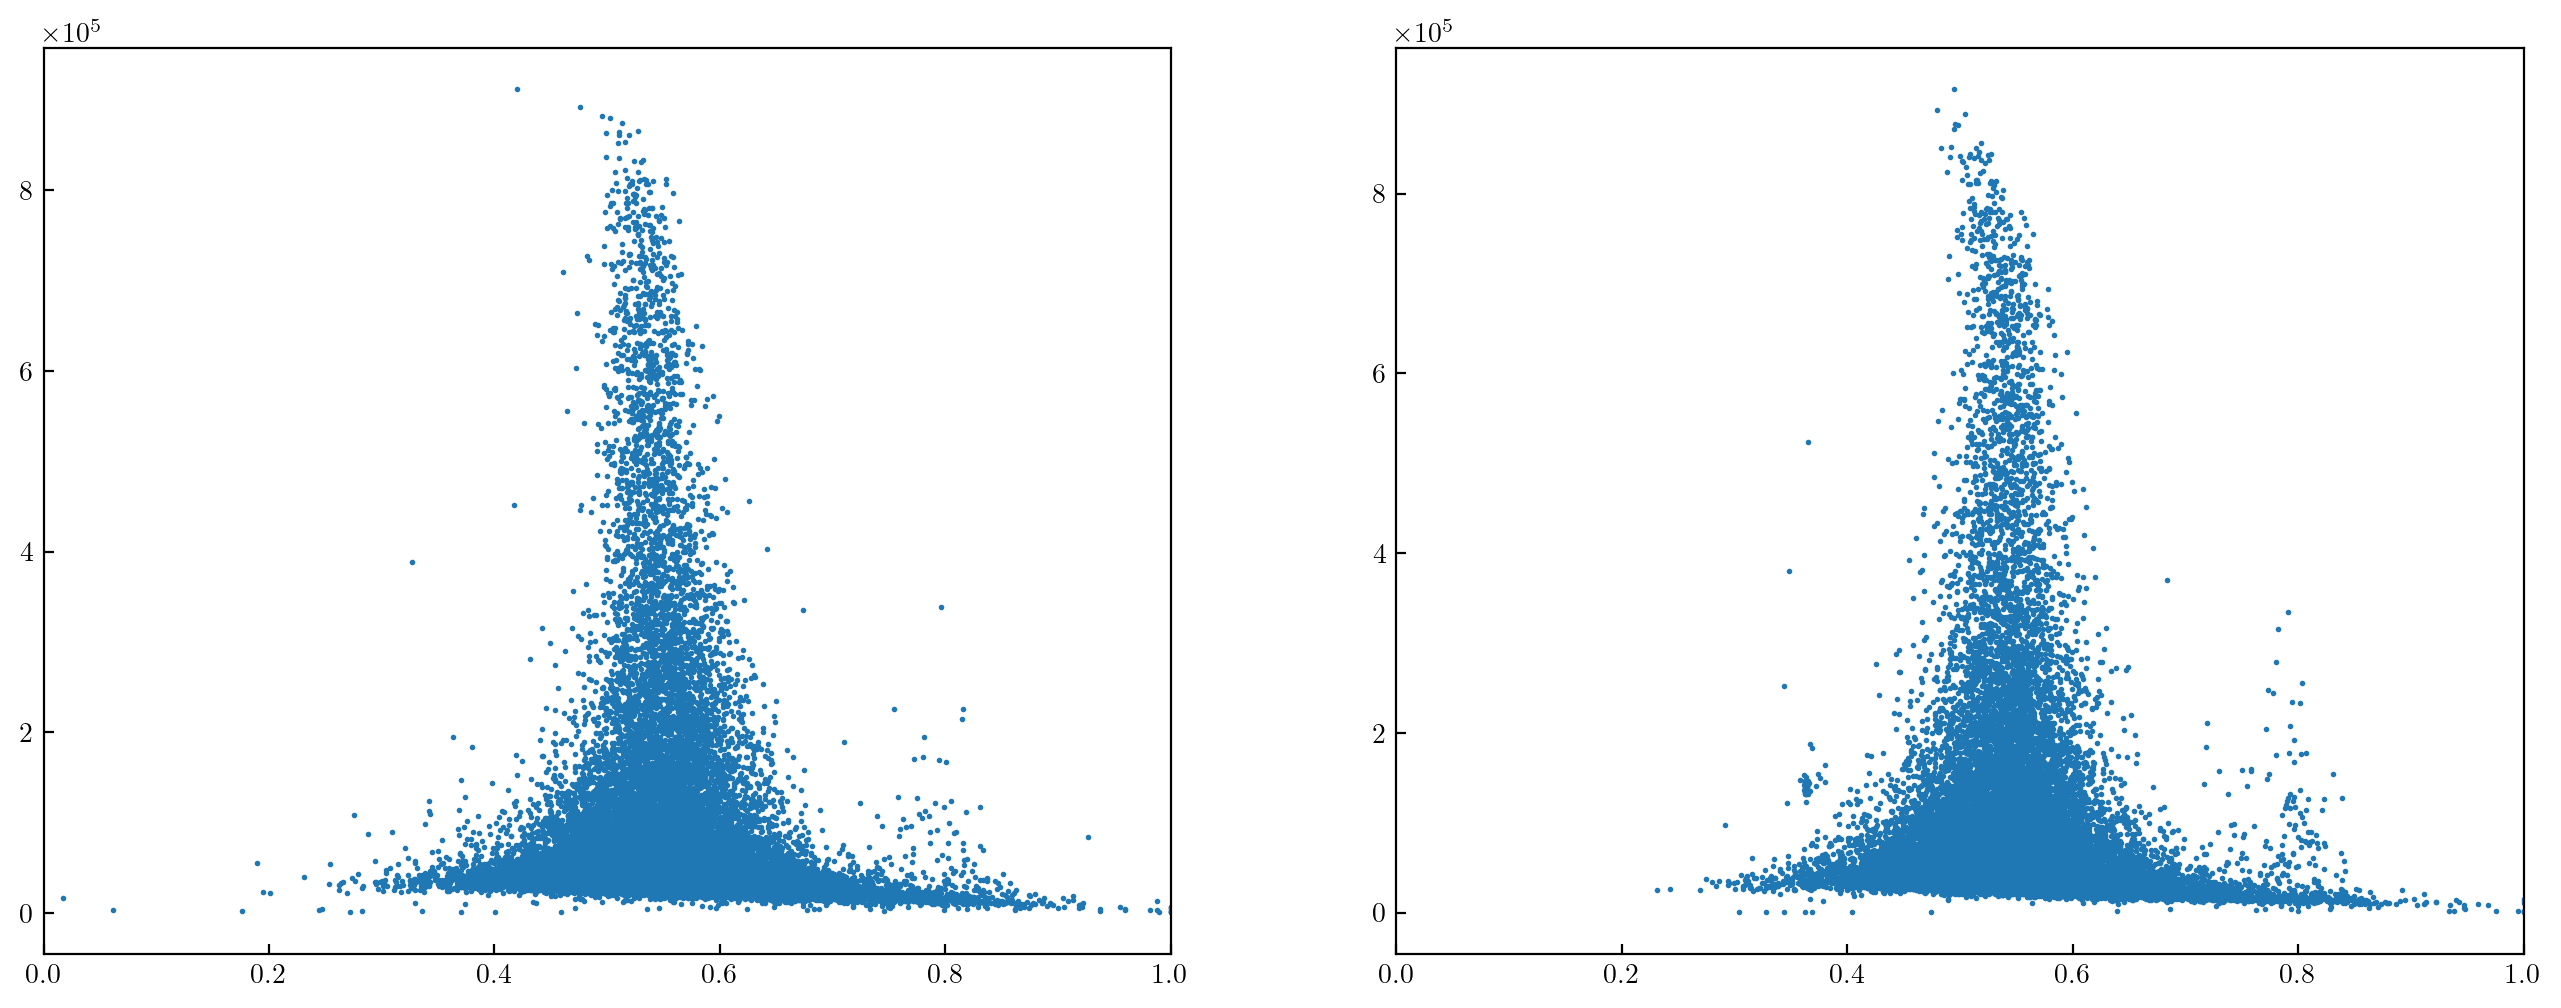

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 6], dpi=200)

ax1.scatter(fpsn, intsn, s=1)
#ax1.plot([0.45, 0.45], [0, 1.2e6], color='k', lw=1)
ax1.set_xlim(0, 1)

ax2.scatter(fpsc, intsc, s=1)
ax2.set_xlim(0, 1)